In [0]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.svm import LinearSVR, SVR

from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

In [0]:
X = np.load("suspended_robot_X_data.npy",allow_pickle=True)
Y = np.load("suspended_robot_Y_data.npy",allow_pickle=True)

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size = 0.7, test_size = 0.3, random_state = 100, shuffle=True)

Building a linear model (stadard Linear Regression)

In [9]:
linear_model_def = LinearRegression()
linear_model_def.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
Y_train_pred = linear_model_def.predict(X_train)
Y_test_pred = linear_model_def.predict(X_test)

In [12]:
r2_score(Y_train,Y_train_pred), r2_score(Y_test,Y_test_pred)

(0.43551469072020477, 0.4357667201737544)

Building a SGDRegressor Model

In [15]:
sgd_reg_model_def = SGDRegressor()
sgd_reg_model_def.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [0]:
Y_train_pred = sgd_reg_model_def.predict(X_train)
Y_test_pred = sgd_reg_model_def.predict(X_test)

In [17]:
r2_score(Y_train,Y_train_pred), r2_score(Y_test,Y_test_pred)

(0.4342694053039472, 0.434361243963859)

In [0]:
params = {"penalty" : ["elasticnet"],
          "l1_ratio" : np.arange(0,1.2,0.2),
          "learning_rate" : ["adaptive"]}

cv = KFold(n_splits=5, 
           shuffle=True, 
           random_state=100 )

sgd_reg_model = SGDRegressor()

grid = GridSearchCV(estimator=sgd_reg_model,param_grid=params,cv=cv,verbose=1,scoring="r2",return_train_score=True,n_jobs=-1)

In [21]:
grid.fit(X_train,Y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.1min finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score='raise-deprecating',
             estimator=SGDRegressor(alpha=0.0001, average=False,
                                    early_stopping=False, epsilon=0.1,
                                    eta0=0.01, fit_intercept=True,
                                    l1_ratio=0.15, learning_rate='invscaling',
                                    loss='squared_loss', max_iter=1000,
                                    n_iter_no_change=5, penalty='l2',
                                    power_t=0.25, random_state=None,
                                    shuffle=True, tol=0.001,
                                    validation_fraction=0.1, verbose=0,
                                    warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'l1_ratio': array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
                         'learning_rate': ['adaptive'],
                         'penalty': ['

In [26]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_l1_ratio,param_learning_rate,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.768753,0.219367,0.005487,0.002245,0,adaptive,elasticnet,"{'l1_ratio': 0.0, 'learning_rate': 'adaptive',...",0.431656,0.435236,0.434743,0.436744,0.438687,0.435413,0.002328,6,0.436446,0.435498,0.435637,0.435202,0.434699,0.435497,0.000574
1,4.764233,0.226543,0.003625,0.000126,0.2,adaptive,elasticnet,"{'l1_ratio': 0.2, 'learning_rate': 'adaptive',...",0.431700,0.435315,0.434779,0.436750,0.438718,0.435452,0.002319,3,0.436446,0.435545,0.435688,0.435201,0.434698,0.435516,0.000577
2,4.437562,0.212208,0.007963,0.000679,0.4,adaptive,elasticnet,"{'l1_ratio': 0.4, 'learning_rate': 'adaptive',...",0.431762,0.435308,0.434745,0.436751,0.438703,0.435454,0.002297,2,0.436404,0.435474,0.435659,0.435197,0.434700,0.435487,0.000561
3,4.229907,0.114978,0.005304,0.002018,0.6,adaptive,elasticnet,"{'l1_ratio': 0.6000000000000001, 'learning_rat...",0.431725,0.435339,0.434776,0.436743,0.438738,0.435464,0.002316,1,0.436440,0.435535,0.435674,0.435200,0.434691,0.435508,0.000576
4,3.986793,0.097415,0.005974,0.001897,0.8,adaptive,elasticnet,"{'l1_ratio': 0.8, 'learning_rate': 'adaptive',...",0.431710,0.435331,0.434779,0.436739,0.438567,0.435425,0.002273,5,0.436445,0.435549,0.435677,0.435180,0.434664,0.435503,0.000588
5,3.927103,0.136017,0.004786,0.001603,1,adaptive,elasticnet,"{'l1_ratio': 1.0, 'learning_rate': 'adaptive',...",0.431619,0.435329,0.434773,0.436745,0.438677,0.435429,0.002334,4,0.436438,0.435549,0.435669,0.435202,0.434697,0.435511,0.000573


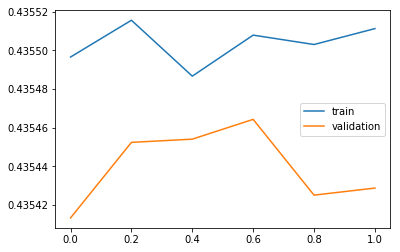

In [37]:
plt.plot(list(grid.cv_results_["param_l1_ratio"]),list(grid.cv_results_["mean_train_score"]),label="train")
plt.plot(list(grid.cv_results_["param_l1_ratio"]),list(grid.cv_results_["mean_test_score"]),label="validation")
plt.legend()
plt.show()

In [33]:
list(grid.cv_results_["mean_train_score"])

[0.435496524141609,
 0.43551556200627467,
 0.4354866282204945,
 0.43550785839999373,
 0.43550299938648723,
 0.4355112345013484]

In [0]:
Y_test_pred = grid.best_estimator_.predict(X_test)

In [39]:
r2_score(Y_test,Y_test_pred)

0.43575942359592623

Building SVM Regressor

In [0]:
svm_reg_def = SVR()

In [0]:
svm_reg_def.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
Y_test_pred = svm_reg_def.predict(X_test)